Import Libraries
---

In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

---
Implement Matrix Game
---

In [2]:
def create_empty_matrix(n):
    matrix = []
    for _ in range(n):
        row = [''] * n
        matrix.append(row)
    return matrix

def print_mat(mat):
    for i in mat:
        print(i)
        
def is_valid(mat, row, col):
    n = len(mat)
    return 0 <= row < n and 0 <= col < n and mat[row, col] == ''

def game_end(mat):
    for i in mat:
        if '' in i:
            return False
    return True

def copy_move(mat, row, col, size):
    mat[row][size - 1 - col] = 0

def bot_move(mat):
    row = random.randint(0,len(mat) - 1)
    col = random.randint(0,len(mat) - 1)
    while mat[row][col] != '':
        row = random.randint(0,len(mat) - 1)
        col = random.randint(0,len(mat) - 1)
    mat[row][col] = 1
    return row, col
    
def result(mat):
    if np.linalg.det(mat) == 0:
        print('You win!')
    else:
        print('You lose!')

def game(n=0,strat=0):
    matrix = create_empty_matrix(n)
    player_turn = 0
    turn = 1
    if strat == 0:  
        n = int(input('dimension for matrix game: '))
        player_turn = int(input('choose player (1/2) (player 1 starts first): ')) % 2
        while not game_end(matrix):
            if turn == player_turn:
                print_mat(matrix)
                row = int(input('choose row: '))
                col = int(input('choose column: '))
                while not is_valid(matrix, row, col):
                    row = int(input('choose row: '))
                    col = int(input('choose column: '))
                matrix[row][col] = 0
                player_turn = (player_turn + 1) % 2
            else:
                _, _ = bot_move(matrix)
                player_turn = (player_turn + 1) % 2
    else:
        while not game_end(matrix):
            if turn == player_turn:
                copy_move(matrix,row,col,n)
                player_turn = (player_turn + 1) % 2
            else:
                row, col = bot_move(matrix)
                player_turn = (player_turn + 1) % 2
    print_mat(matrix)
    result(matrix)

In [3]:
for i in range(4,10,2):
    game(i,1)
    print('------------------')

[0, 1, 0, 1]
[0, 0, 1, 1]
[1, 1, 0, 0]
[1, 0, 1, 0]
You win!
------------------
[0, 1, 0, 1, 0, 1]
[1, 0, 1, 0, 1, 0]
[0, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0]
[0, 1, 0, 1, 0, 1]
You win!
------------------
[0, 0, 1, 0, 1, 0, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 0, 1, 0]
[0, 1, 0, 0, 1, 1, 0, 1]
[0, 1, 0, 0, 1, 1, 0, 1]
[0, 1, 1, 1, 0, 0, 0, 1]
[0, 1, 1, 0, 1, 0, 0, 1]
You win!
------------------


In [4]:
# game(strat=0)

---
Plot
---

In [5]:
def count_zero_determinant_matrices(n, zeros, ones, row=0, col=0, grid=None):
    if grid is None:
        grid = [[-1]*n for _ in range(n)]
    
    if row == n:
        matrix = np.array(grid)
        if np.linalg.det(matrix) == 0:
            return 1
        else:
            return 0
    
    next_row = row + (col + 1) // n
    next_col = (col + 1) % n
    
    count = 0
    if zeros > 0:
        grid[row][col] = 0
        count += count_zero_determinant_matrices(n, zeros - 1, ones, next_row, next_col, grid)
    
    if ones > 0:
        grid[row][col] = 1
        count += count_zero_determinant_matrices(n, zeros, ones - 1, next_row, next_col, grid)
    
    return count

In [6]:
cs = []
for n in range(1,6):
    zeros = n*n // 2 + n*n % 2
    ones = n*n // 2
    print(f'working on n = {n} ...')
    cs.append(count_zero_determinant_matrices(n, zeros, ones) / math.comb(n*n,zeros))

working on n = 1 ...
working on n = 2 ...
working on n = 3 ...
working on n = 4 ...
working on n = 5 ...


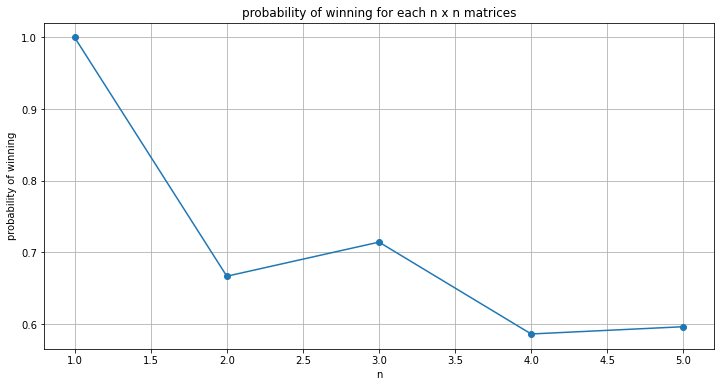

In [7]:
plt.figure(figsize=(12,6))
plt.plot(range(1,6),cs,'-o')
plt.xlabel('n')
plt.ylabel('probability of winning')
plt.title('probability of winning for each n x n matrices')
plt.grid(True)